In [1]:
import pandas as pd
import numpy as np

In [2]:
!git clone https://github.com/hiseoung/BigDataTeamProject.git

Cloning into 'BigDataTeamProject'...
remote: Enumerating objects: 421, done.
remote: Counting objects: 100% (421/421), done.
remote: Compressing objects: 100% (342/342), done.
remote: Total 421 (delta 178), reused 181 (delta 56), pack-reused 0
Receiving objects: 100% (421/421), 41.80 MiB | 19.63 MiB/s, done.
Resolving deltas: 100% (178/178), done.
Checking out files: 100% (121/121), done.


In [3]:
a = pd.read_csv('/content/BigDataTeamProject/data/corona.csv')

In [4]:
a.rename(columns={'Death/100L Pop' : 'Death/100K Pop'})

,Country,Confirmed,Deaths,Case-Fatality,Death/100K Pop
0,Peru,"2,246,633","201,450",9.0%,619.65
1,Bulgaria,"709,537","29,279",4.1%,419.72
2,Bosnia and Herzegovina,"279,820","12,854",4.6%,389.40
3,Montenegro,"159,034","2,339",1.5%,375.96
4,North Macedonia,"218,194","7,688",3.5%,369.00
...,...,...,...,...,...
179,New Zealand,"12,623",44,0.3%,0.89
180,Bhutan,"2,642",3,0.1%,0.39
181,China,"112,002","4,849",4.3%,0.35
182,Burundi,"20,523",38,0.2%,0.33


In [ ]:
%cd BigDataTeamProject/

/content/BigDataTeamProject


In [ ]:
!pip install chart_studio
!pip install cufflinks
!pip install plotly_express
!pip install -U pandas-profiling

     |████████████████████████████████| 64 kB 1.9 MB/s 
     |████████████████████████████████| 261 kB 4.2 MB/s 
     |████████████████████████████████| 596 kB 50.0 MB/s 
     |████████████████████████████████| 102 kB 9.6 MB/s 
     |████████████████████████████████| 303 kB 73.9 MB/s 
     |████████████████████████████████| 10.1 MB 38.5 MB/s 
     |████████████████████████████████| 62 kB 785 kB/s 
     |████████████████████████████████| 675 kB 63.4 MB/s 
     |████████████████████████████████| 3.1 MB 69.8 MB/s 
     |████████████████████████████████| 812 kB 62.5 MB/s 
     |████████████████████████████████| 38.1 MB 1.4 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=5ec83185613afe589a2c0e2a303d977510be3c0fd6f458a6c1e3e814b957be25
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=e68d844158b

In [ ]:
path = '/content/BigDataTeamProject/data/olympic_all'

In [ ]:
f1 = '/olympic_results.csv'
medal_df = pd.read_csv(path+f1)
medal_df.head(5)

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
0,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,GOLD,"[('Fatima GALVEZ', 'https://olympics.com/en/at...",False,1,Spain,ES,ESP,NaN,NaN,NaN,NaN
1,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,SILVER,"[('Alessandra PERILLI', 'https://olympics.com/...",False,2,San Marino,SM,SMR,NaN,NaN,NaN,NaN
2,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,BRONZE,"[('Madelynn Ann BERNAU', 'https://olympics.com...",False,3,United States of America,US,USA,NaN,NaN,NaN,NaN
3,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,NaN,"[('Zuzana STEFECEKOVA', 'https://olympics.com/...",False,4,Slovakia,SK,SVK,NaN,NaN,NaN,NaN
4,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,NaN,"[('Yukie NAKAYAMA', 'https://olympics.com/en/a...",False,5,Japan,JP,JPN,NaN,NaN,NaN,NaN


In [ ]:
def get_medals(df_):
    df = df_.copy()
    df = df[~df['medal_type'].isna()]
    
    medals = df['medal_type'].value_counts()
    
    try:
        gold = medals['GOLD']
    except:
        gold = 0
    try:
        silver = medals['SILVER']
    except:
        silver = 0
    try:
        bronze = medals['BRONZE']
    except:
        bronze = 0
        
    return gold, silver, bronze
    
    
def get_event(df_):
    df = df_.copy()
    
    return_count = len(df['discipline_title'].unique())
    return return_count 

In [ ]:
games_list = medal_df['slug_game'].unique().tolist()
game_group = medal_df.groupby('slug_game')

nations_list = []
olympic_list = []
gold_list = []
silver_list = []
bronze_list = []
event_list = []
for game in games_list:
    game_df = game_group.get_group(game)
    
    nation_list = game_df['country_name'].unique().tolist()
    nation_group = game_df.groupby('country_name')
    
    for nation in nation_list:
        nation_df = nation_group.get_group(nation)
        
        olympic = nation_df.iloc[0, 2]
        nation = nation_df.iloc[0, 8]
        event_count = get_event(nation_df)
        gold, silver, bronze = get_medals(nation_df)
        
        nations_list.append(nation)
        olympic_list.append(olympic)
        gold_list.append(gold)
        silver_list.append(silver)
        bronze_list.append(bronze)
        event_list.append(event_count)

print(len(nations_list))
print(len(olympic_list))
print(len(gold_list))
print(len(silver_list))
print(len(bronze_list))
print(len(event_list))
final_df = pd.DataFrame({
    'Nation': nations_list,
    'Olympic': olympic_list,
    'Gold': gold_list,
    'Silver': silver_list,
    'Bronze': bronze_list,
    'event_count': event_list
})
final_df        

4009
4009
4009
4009
4009
4009


,Nation,Olympic,Gold,Silver,Bronze,event_count
0,Spain,tokyo-2020,3,8,6,36
1,San Marino,tokyo-2020,0,1,2,3
2,United States of America,tokyo-2020,39,41,33,43
3,Slovakia,tokyo-2020,1,2,1,12
4,Japan,tokyo-2020,27,13,17,46
...,...,...,...,...,...,...
4004,Sweden,athens-1896,0,0,0,3
4005,Chile,athens-1896,0,0,0,1
4006,Great Britain,athens-1896,2,3,2,9
4007,Switzerland,athens-1896,1,2,0,2


In [ ]:
temp = final_df.sort_values('Gold', ascending=False)
temp[temp['Nation'] == 'Japan']

,Nation,Olympic,Gold,Silver,Bronze,event_count
4,Japan,tokyo-2020,27,13,17,46
3088,Japan,tokyo-1964,16,5,8,23
1168,Japan,athens-2004,16,9,12,32
2803,Japan,munich-1972,13,8,8,20
304,Japan,rio-2016,12,8,21,38
2950,Japan,mexico-city-1968,11,7,7,18
2354,Japan,los-angeles-1984,10,8,14,24
2640,Japan,montreal-1976,9,6,10,19
862,Japan,beijing-2008,9,8,8,35
573,Japan,london-2012,7,14,17,35


In [ ]:
date = []
label = []
for i in zip(temp['Olympic']):
  idx = int(i[0].split('-')[-1])
  date.append(i[0].split('-')[-1])
  if idx % 4 == 0:
    label.append('summer')
  else:
    label.append('winter')
print(date)

['1984', '1980', '1904', '1908', '1988', '1972', '1976', '2008', '1980', '2016', '2012', '1968', '1924', '1992', '1996', '1960', '1932', '1920', '1976', '1952', '2020', '2012', '1948', '2020', '1992', '1956', '2000', '1988', '1988', '2008', '2004', '1964', '1976', '1960', '1992', '1972', '2004', '1956', '2000', '1936', '1964', '1968', '2012', '2004', '2000', '2020', '2016', '1996', '2016', '1900', '1912', '1912', '2008', '1936', '1908', '1952', '1928', '2020', '1972', '2012', '2020', '1984', '1996', '1920', '2008', '2016', '1900', '2004', '2016', '1984', '2020', '1996', '1992', '2008', '1948', '1952', '1964', '2004', '2000', '1984', '1996', '1920', '1900', '1924', '1920', '2008', '1992', '1920', '2018', '2018', '2010', '1984', '1920', '1972', '1992', '1972', '1920', '1960', '2012', '1956', '1976', '1924', '2000', '2000', '2000', '2008', '1996', '2002', '2004', '1952', '2002', '1988', '2000', '1932', '1992', '1960', '1998', '2016', '1988', '1988', '2006', '1988', '2004', '2014', '1964',

In [ ]:
temp['date'] = date
temp['label'] = label

In [ ]:
temp.head()

,Nation,Olympic,Gold,Silver,Bronze,event_count,date,label
2351,United States of America,los-angeles-1984,83,61,30,28,1992,summer
2527,Soviet Union,moscow-1980,80,69,46,26,1992,summer
3951,United States of America,st-louis-1904,76,78,77,18,1992,summer
3928,Great Britain,london-1908,56,51,39,23,1992,summer
2135,Soviet Union,seoul-1988,55,31,46,29,1992,summer


In [ ]:
temp_ =temp.sort_values('date', ascending=False)
data_japan = temp_[temp_['Nation'] == 'Japan']
data_japan = data_japan[data_japan['label'] == 'summer']
data_japan = data_japan[data_japan['date'] >= '1994']

In [ ]:
data_japan.head()

,Nation,Olympic,Gold,Silver,Bronze,event_count,date,label
4,Japan,tokyo-2020,27,13,17,46,2020,summer
304,Japan,rio-2016,12,8,21,38,2016,summer
573,Japan,london-2012,7,14,17,35,2012,summer
862,Japan,beijing-2008,9,8,8,35,2008,summer
1168,Japan,athens-2004,16,9,12,32,2004,summer


In [ ]:
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
data_japan['date'] = pd.to_datetime(data_japan['date'], format='%Y')

In [ ]:
data_japan = data_japan.set_index('date')

In [ ]:
data_plot = data_japan[['Bronze', 'Silver', 'Gold']]

In [ ]:
data_plot.iplot(kind='area', theme = 'henanigans', fill=True)

In [ ]:
corona = pd.read_csv('/content/tokyo_corona (2).csv')

In [ ]:
corona.rename(columns={'Death/100L Pop' : 'Death/100K Pop'})

,Nation,Olympic,Gold,Silver,Bronze,event_count,Confirmed,Deaths,Case-Fatality,Death/100K Pop
0,United States of America,tokyo-2020,39,41,33,43,49538947,793228,1.6,241.66
1,People's Republic of China,tokyo-2020,38,32,18,41,112002,4849,4.3,0.35
2,Japan,tokyo-2020,27,13,17,46,1727504,18366,1.1,14.55
3,Great Britain,tokyo-2020,22,21,22,35,10671538,146444,1.4,219.11
4,ROC,tokyo-2020,20,28,22,38,9722639,279280,2.9,193.44
...,...,...,...,...,...,...,...,...,...,...
185,Paraguay,tokyo-2020,0,0,0,5,463479,16484,3.6,233.99
186,Costa Rica,tokyo-2020,0,0,0,6,567706,7324,1.3,145.10
187,Luxembourg,tokyo-2020,0,0,0,6,92574,889,1.0,143.41
188,Trinidad and Tobago,tokyo-2020,0,0,0,7,77482,2320,3.0,166.31


In [ ]:
corona = corona.dropna()

In [ ]:
li = []
li2 = []
for death, pop, confirmed in zip(corona['Deaths'], corona['Death/100L Pop'], corona['Confirmed']):
  try:
    if pop == 0:
      pop = 1
    if death == 0:
      death = 1
    li.append(round((death/pop) * 100000))
  except:
    print(pop)
    print(death)  
  li2.append(round(confirmed / round((death/pop) * 100000), 2))
corona['population'] = li
corona['Confirmed/Pop'] = li2

In [ ]:
corona.sort_values(by='Confirmed/Pop', ascending=False).head(20)

,Nation,Olympic,Gold,Silver,Bronze,event_count,Confirmed,Deaths,Case-Fatality,Death/100L Pop,population,Confirmed/Pop
127,Montenegro,tokyo-2020,0,0,0,6,159034,2339,1.5,375.96,622141,0.26
91,Andorra,tokyo-2020,0,0,0,1,18815,133,0.7,172.41,77142,0.24
37,Georgia,tokyo-2020,2,5,1,8,875806,12519,1.4,336.50,3720357,0.24
69,Seychelles,tokyo-2020,0,0,0,2,23750,127,0.5,130.09,97625,0.24
53,Slovakia,tokyo-2020,1,2,1,12,1255086,15095,1.2,276.77,5453987,0.23
26,Slovenia,tokyo-2020,3,1,1,15,434679,5354,1.2,256.42,2087981,0.21
189,San Marino,tokyo-2020,0,1,2,3,6308,94,1.5,277.61,33860,0.19
24,Serbia,tokyo-2020,3,1,5,15,1268787,12036,0.9,173.31,6944781,0.18
101,Maldives,tokyo-2020,0,0,0,1,92629,255,0.3,48.03,530918,0.17
21,Belgium,tokyo-2020,3,1,3,25,1898498,27416,1.4,238.73,11484103,0.17


In [ ]:
corona.to_csv('/content/new_corona.csv', index=False)

In [ ]:
temp = corona['Confirmed'].tolist()
c_max = max(temp)
c_min = min(temp)

In [ ]:
li = []
for i in corona['Confirmed'].tolist():
  li.append((i-c_min)/(c_max - c_min))

In [ ]:
corona['scaled_Confirmed'] = li

In [ ]:
corona.head()

,Nation,Olympic,Gold,Silver,Bronze,event_count,Confirmed,Deaths,Case-Fatality,Death/100L Pop,population,Confirmed/Pop,scaled_Confirmed
0,United States of America,tokyo-2020,39,41,33,43,49538947,793228,1.6,241.66,328241331,0.15,1.000000
1,People's Republic of China,tokyo-2020,38,32,18,41,112002,4849,4.3,0.35,1385428571,0.00,0.002261
2,Japan,tokyo-2020,27,13,17,46,1727504,18366,1.1,14.55,126226804,0.01,0.034872
3,Great Britain,tokyo-2020,22,21,22,35,10671538,146444,1.4,219.11,66835836,0.16,0.215417
4,ROC,tokyo-2020,20,28,22,38,9722639,279280,2.9,193.44,144375517,0.07,0.196263


In [ ]:
qu = corona[corona['Gold'] > 35]

In [ ]:
qu.head()

,Nation,Olympic,Gold,Silver,Bronze,event_count,Confirmed,Deaths,Case-Fatality,Death/100L Pop,population,Confirmed/Pop,scaled_Confirmed
0,United States of America,tokyo-2020,39,41,33,43,49538947,793228,1.6,241.66,328241331,0.15,1.000000
1,People's Republic of China,tokyo-2020,38,32,18,41,112002,4849,4.3,0.35,1385428571,0.00,0.002261


In [ ]:
corona_Fatal_10 = corona.sort_values(by='Case-Fatality', ascending=False).head(10)
corona_Confirmed_10 = corona.sort_values(by='Confirmed/Pop', ascending=False).head(10)

In [ ]:
corona_Fatal_10.head()

,Nation,Olympic,Gold,Silver,Bronze,event_count,Confirmed,Deaths,Case-Fatality,Death/100L Pop,population,Confirmed/Pop,scaled_Confirmed
118,Yemen,tokyo-2020,0,0,0,2,10047,1956,19.5,6.71,29150522,0.00,0.000203
145,Peru,tokyo-2020,0,0,0,15,2246633,201450,9.0,619.65,32510288,0.07,0.045351
137,Mexico,tokyo-2020,0,0,4,29,3905319,295602,7.6,231.71,127574123,0.03,0.078833
75,Sudan,tokyo-2020,0,0,0,2,44406,3201,7.2,7.48,42794118,0.00,0.000896
40,Ecuador,tokyo-2020,2,1,0,16,530126,33494,6.3,192.79,17373308,0.03,0.010701


In [ ]:
corona_Confirmed_10.head()

,Nation,Olympic,Gold,Silver,Bronze,event_count,Confirmed,Deaths,Case-Fatality,Death/100L Pop,population,Confirmed/Pop,scaled_Confirmed
127,Montenegro,tokyo-2020,0,0,0,6,159034,2339,1.5,375.96,622141,0.26,0.003210
91,Andorra,tokyo-2020,0,0,0,1,18815,133,0.7,172.41,77142,0.24,0.000380
37,Georgia,tokyo-2020,2,5,1,8,875806,12519,1.4,336.50,3720357,0.24,0.017679
69,Seychelles,tokyo-2020,0,0,0,2,23750,127,0.5,130.09,97625,0.24,0.000479
53,Slovakia,tokyo-2020,1,2,1,12,1255086,15095,1.2,276.77,5453987,0.23,0.025335


In [ ]:
corona_Confirmed_10.to_csv('/content/confirmed_10.csv')
corona_Fatal_10.to_csv('/content/fatal_10.csv')

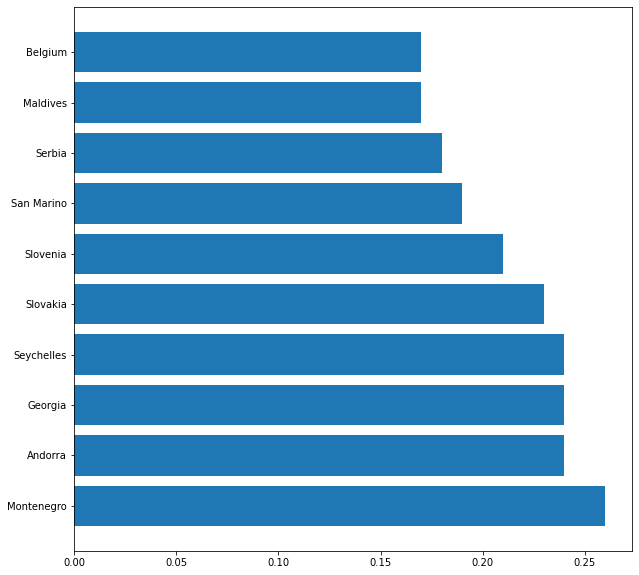

In [ ]:
def plot_barh_confirmed(sample):

  fig = plt.figure(figsize=(10, 10))

  nations = sample['Nation']
  values = sample['Confirmed/Pop']

  y = np.arange(len(sample))
  plt.barh(y, values)
  plt.yticks(y, nations)

  return fig

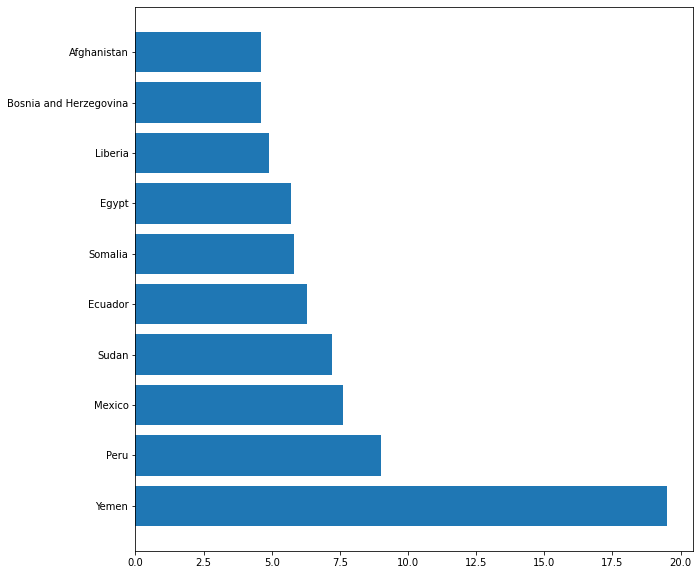

In [ ]:
def plot_barh_fatal(sample):

  fig = plt.figure(figsize=(10, 10))

  nations = sample['Nation']
  values = sample['Case-Fatality']

  y = np.arange(len(sample))
  plt.barh(y, values)
  plt.yticks(y, nations)

  return fig

In [ ]:
def plot_bubble_fatal(corona):
  fig = plt.figure(figsize=(8,8))
  fig.set_facecolor('white')

  plt.scatter(
      x = corona['Case-Fatality'], 
      y = corona['Gold'], 
      c=corona['Nation'].astype('category').cat.codes,
      s=corona['population']/1000000,
      cmap="rainbow", 
      alpha=0.8, 
      edgecolors="white", 
      linewidth=2);

  plt.yscale('linear')
  plt.xlabel("Case-Fatality")
  plt.ylabel("Medal")
  plt.title("2020 Tokyo Olympic")
  plt.grid(True, which='major', linestyle='--', linewidth=0.5)
  plt.show()

  return fig

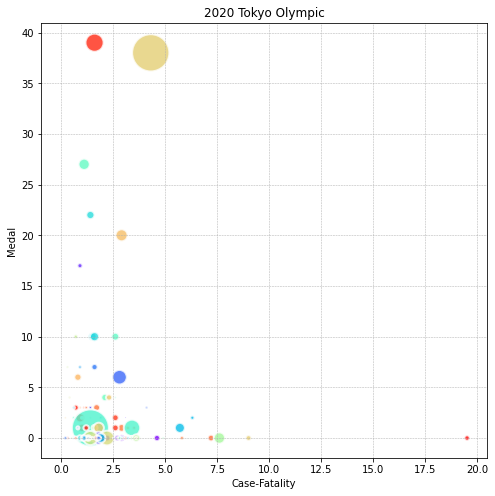

In [ ]:
def plot_bubble_fatal(corona):
  fig = plt.figure(figsize=(8,8))
  fig.set_facecolor('white')

  plt.scatter(
      x = corona['Case-Fatality'], 
      y = corona['Gold'], 
      c=corona['Nation'].astype('category').cat.codes,
      s=corona['population']/1000000,
      cmap="rainbow", 
      alpha=0.8, 
      edgecolors="white", 
      linewidth=2);

  plt.yscale('linear')
  plt.xlabel("Case-Fatality")
  plt.ylabel("Medal")
  plt.title("2020 Tokyo Olympic")
  plt.grid(True, which='major', linestyle='--', linewidth=0.5)
  plt.show()

  return fig

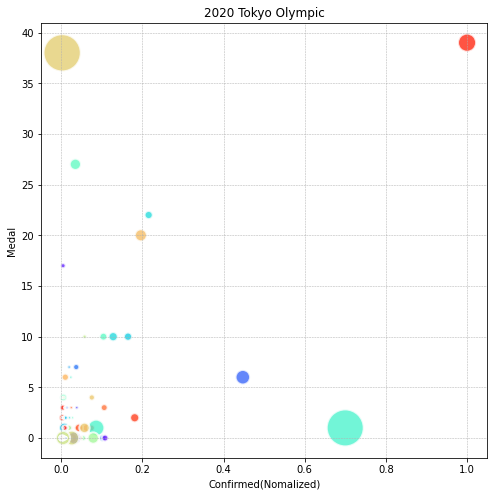

In [ ]:
def plot_bubble_confirmed(corona):
  fig = plt.figure(figsize=(8,8))
  fig.set_facecolor('white')

  plt.scatter(
      x = corona['scaled_Confirmed'], 
      y = corona['Gold'], 
      c=corona['Nation'].astype('category').cat.codes,
      s=corona['population']/1000000,
      cmap="rainbow", 
      alpha=0.8, 
      edgecolors="white", 
      linewidth=2);

  plt.yscale('linear')
  plt.xlabel("Confirmed(Nomalized)")
  plt.ylabel("Medal")
  plt.title("2020 Tokyo Olympic")
  plt.grid(True, which='major', linestyle='--', linewidth=0.5)
  plt.show()

  return fig

In [ ]:
corona = corona.iloc[:, 0:6]

In [ ]:
temp = final_df.sort_values('Gold', ascending=False)
tokyo = temp[temp['Olympic'] == 'tokyo-2020']

In [ ]:
gdp = pd.read_csv('/content/gdp_csv 2.csv')
gdp

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10
...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10
11503,Zimbabwe,ZWE,2013,1.545177e+10
11504,Zimbabwe,ZWE,2014,1.589105e+10
11505,Zimbabwe,ZWE,2015,1.630467e+10


In [ ]:
dict = {i:0 for i in tokyo['Nation'].tolist()}

for country, fatal in zip(corona['Country'], corona['Case-Fatality']):
  fatal = float(fatal.replace('%', ''))
  if dict.get(country) != None:
    dict[f'{country}'] = fatal
  elif country == 'United States':
    dict['United States of America'] = fatal
  elif country == 'China':
    dict['People\'s Republic of China'] = fatal
  elif country == 'Russia':
    dict['ROC'] = fatal
  elif country =='United Kingdom':
    dict['Great Britain'] = fatal
  elif country == 'South Korea':
    dict['Republic of Korea'] = fatal
  else:
    test.append(country)
    print(country)
    pass

li = []
for country in tokyo['Nation'].tolist():
  if dict.get(country):
    li.append(dict[f'{country}'])
  else:
    print(country)
    li.append(0)


Moldova
Czechia
Iran
West Bank and Gaza
Barbados
St. Vincent and the Grenadines
Cabo Verde
Saint Kitts and Nevis
Brunei
Mauritania
Cambodia
Syria
Equatorial Guinea
Timor-Leste
Republic of the Congo
Taiwan
Laos
Central African Republic
Tanzania
South Sudan
------------------------------------------------------------------------------
count_1 : 159
count_2 : 20
------------------------------------------------------------------------------
Czech Republic
Islamic Republic of Iran
Chinese Taipei
Hong Kong, China
Bermuda
Puerto Rico
Turkmenistan
Lao People's Democratic Republic
Palestine
Virgin Islands, US
Solomon Islands
United Republic of Tanzania
Nauru
Virgin Islands, British
American Samoa
Kiribati
Guam
Tonga
Vanuatu
Syrian Arab Republic
Aruba
Republic of Moldova
Refugee Olympic Team
Cape Verde
Cook Islands
Samoa


In [ ]:
tokyo['Case-Fatality'] = li

In [ ]:
tokyo.to_csv('/content/BigDataTeamProject/tokyo_corona.csv', index=False)

In [ ]:
tokyo = pd.read_csv('/content/tokyo_corona (1).csv')

In [ ]:
tokyo[tokyo['Nation'] == 'Japan'].head()

,Nation,Olympic,Gold,Silver,Bronze,event_count,Confirmed,Deaths,Case-Fatality,Death/100L Pop
2,Japan,tokyo-2020,27,13,17,46,1727504,18366,1.1,14.55


In [ ]:
sample = tokyo[['Nation', 'Death/100L Pop']].sort_values(by=['Death/100L Pop'], axis=0, ascending=False).head(20)
sample = sample.sort_values(by=['Death/100L Pop'], axis=0, ascending=True)
sample = sample.reset_index()

In [ ]:
sample.head()

,index,Nation,Death/100L Pop
0,116,Paraguay,233.99
1,55,Belgium,238.73
2,2,United States of America,241.66
3,39,Lithuania,247.63
4,41,Colombia,256.01


In [ ]:
import plotly.express as px
fig = px.bar(sample, x='Death/100L Pop', y='Nation', orientation='h')
template = 'plotly_dark'
fig.update_traces(marker_color='#FCE762')
fig.update_layout(template=template, title="Corona Death/100L Population: '%s' theme" % template)
fig.show()

In [ ]:
country = sample['Nation'].tolist()
sample['Confirmed'].iplot(kind='barh', theme = 'henanigans', labels=sample['Confirmed'].tolist())

In [ ]:
tokyo_corr = corona[['Gold', 'event_count','Case-Fatality', 'Confirmed/Pop']]

In [ ]:
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_corr(tokyo):
  tokyo_corr = tokyo[['Gold', 'event_count','Case-Fatality', 'Death/100L Pop']]
  feature = ['Gold', 'event_count','Case-Fatality', 'Death/100L Pop']
  corr_feture = tokyo_corr.corr()

  fig = plt.figure(figsize=(10, 10))

  n_feature = len(feature)
  for i in range(n_feature):
    for j in range(n_feature):
      ax = fig.add_subplot(n_feature, n_feature, i*n_feature + j + 1)
      plt.scatter(feature[j], feature[i], data=tokyo_corr, s=9)

      if i == n_feature-1:
        plt.xlabel(feature[j], fontsize=12)
      if j == 0:
        plt.ylabel(feature[i], fontsize=12)
      ax.annotate(np.round(corr_feture.loc[feature[i], feature[j]], 3), xy=(1,0),
                  xycoords='axes fraction', fontsize=16,
                  horizontalalignment='right', verticalalignment='bottom')
  return fig

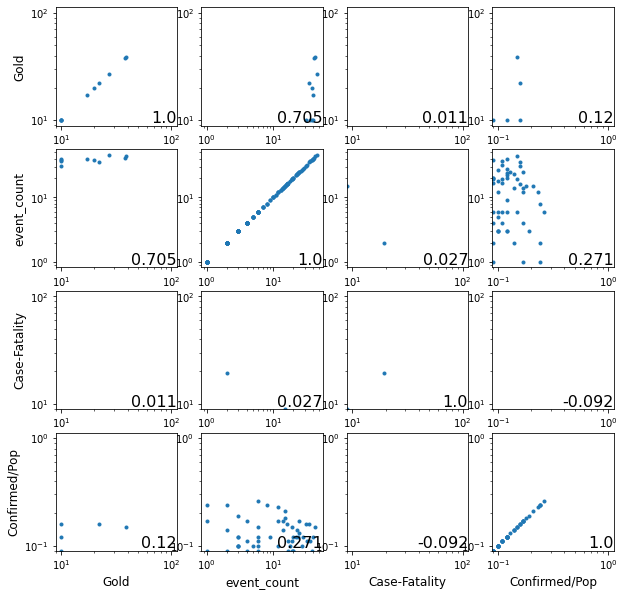

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

feature = ['Gold', 'event_count','Case-Fatality', 'Confirmed/Pop']
corr_feture = tokyo_corr.corr()

fig = plt.figure(figsize=(10, 10))

n_feature = len(feature)
for i in range(n_feature):
  for j in range(n_feature):
    ax = fig.add_subplot(n_feature, n_feature, i*n_feature + j + 1)
    plt.scatter(feature[j], feature[i], data=tokyo_corr, s=9)

    if i == n_feature-1:
      plt.xlabel(feature[j], fontsize=12)
    if j == 0:
      plt.ylabel(feature[i], fontsize=12)
    plt.xscale('log')
    plt.yscale('log')
    ax.annotate(np.round(corr_feture.loc[feature[i], feature[j]], 3), xy=(1,0),
                xycoords='axes fraction', fontsize=16,
                horizontalalignment='right', verticalalignment='bottom')

In [ ]:
import pandas_profiling
pr = tokyo_corr.profile_report()
pr

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
temp.head()

,Nation,Olympic,Gold,Silver,Bronze,event_count,date,label
2351,United States of America,los-angeles-1984,83,61,30,28,1984,summer
2527,Soviet Union,moscow-1980,80,69,46,26,1980,summer
3951,United States of America,st-louis-1904,76,78,77,18,1904,summer
3928,Great Britain,london-1908,56,51,39,23,1908,summer
2135,Soviet Union,seoul-1988,55,31,46,29,1988,summer


In [ ]:
nation = {i:0 for i in temp['Nation'].tolist()}

In [ ]:
gdp.head()

,Country Name,Country Code,Year,Value
26,Arab World,ARB,1994,4.875269e+11
27,Arab World,ARB,1995,5.237599e+11
28,Arab World,ARB,1996,5.782313e+11
29,Arab World,ARB,1997,6.132795e+11
30,Arab World,ARB,1998,5.915256e+11


In [ ]:
max(gdp['Year'].tolist())

2016

In [ ]:
def plot_gdp_2020():

  sample = pd.DataFrame({
      'Nation' : ['United States', 'China', 'Japan', 'Germany', 'United Kingdom', 'India', 'France', 'Italy', 'Canada', 'Korea'],
      'Value' : [20893.75, 14866.74, 5045.10, 3843.34, 2709.68, 2660.24, 2624.42, 1884.94, 1644.04, 1638.26]
  })
  sample = sample.sort_values(by='Value', ascending=True)

  fig = plt.figure(figsize=(10, 10))

  nations = sample['Nation']
  values = sample['Value']

  y = np.arange(len(sample))
  plt.bar(y, values)
  plt.title('GDP Rank')
  plt.xticks(y, nations)

  return fig

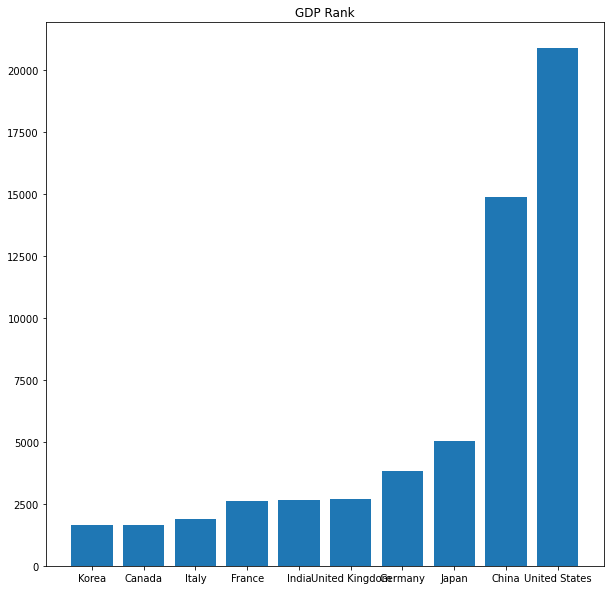

In [ ]:
data = plot_gdp_2020()

In [ ]:
gdp_2020 = gdp[gdp['Year'] == 2016]
gdp_2020.sort_values(by='Value', ascending=False).head(20)

,Country Name,Country Code,Year,Value
2305,World,WLD,2016,7.584511e+13
718,High income,HIC,2016,4.855746e+13
1656,OECD members,OED,2016,4.755262e+13
1802,Post-demographic dividend,PST,2016,4.521331e+13
832,IDA & IBRD total,IBT,2016,2.797282e+13
1300,Low & middle income,LMY,2016,2.729938e+13
1542,Middle income,MIC,2016,2.689707e+13
775,IBRD only,IBD,2016,2.598148e+13
246,East Asia & Pacific,EAS,2016,2.248043e+13
2248,Upper middle income,UMC,2016,2.062386e+13


In [ ]:
def plot_gdp(sample):

  plt.figure(figsize=(10, 10))

  nations = sample['Nation']
  values = sample['Death/100L Pop']

  y = np.arange(len(sample))
  fig = plt.barh(y, values)
  fig = plt.yticks(y, nations)

  return fig
plot_corona(sample)

In [ ]:
nation.keys()

dict_keys(['United States of America', 'Soviet Union', 'Great Britain', "People's Republic of China", 'German Democratic Republic (Germany)', 'Unified Team', 'Germany', 'Russian Federation', 'Japan', 'France', 'Sweden', 'ROC', 'Romania', 'Australia', 'Federal Republic of Germany', 'Hungary', 'Finland', 'Belgium', 'Cuba', 'Norway', 'Canada', 'Italy', 'Spain', 'Republic of Korea', 'Netherlands', 'Greece', 'Bulgaria', 'Ukraine', 'Austria', 'MIX', 'New Zealand', 'Turkey', 'Poland', 'Yugoslavia', 'Czechoslovakia', 'Switzerland', 'Brazil', 'Kenya', 'Jamaica', 'Islamic Republic of Iran', 'Belarus', 'Croatia', 'Denmark', "Democratic People's Republic of Korea", 'Czech Republic', 'South Africa', 'Ethiopia', 'Uzbekistan', 'Kazakhstan', 'Argentina', 'Georgia', 'Estonia', 'Serbia', 'Thailand', 'Slovenia', 'Slovakia', 'Ireland', 'Colombia', 'Mexico', 'Uganda', 'Kosovo', 'Chinese Taipei', 'Azerbaijan', 'Israel', 'Mongolia', 'Indonesia', 'Ecuador', 'Qatar', 'Egypt', 'Algeria', 'Australasia', 'Lithuan

In [ ]:
temp.head()

,Nation,Olympic,Gold,Silver,Bronze,event_count,date,label
2351,United States of America,los-angeles-1984,83,61,30,28,1992,summer
2527,Soviet Union,moscow-1980,80,69,46,26,1992,summer
3951,United States of America,st-louis-1904,76,78,77,18,1992,summer
3928,Great Britain,london-1908,56,51,39,23,1992,summer
2135,Soviet Union,seoul-1988,55,31,46,29,1992,summer


In [ ]:
data_1994 = temp[temp['date'] >= '1994']
# data_1994 = data_1994[data_1994['label'] == 'summer']

In [ ]:
data_1994.head(20)

,Nation,Olympic,Gold,Silver,Bronze,event_count,date,label


In [ ]:
grouped = data_1994.groupby(data_1994['Nation']).mean()

In [ ]:
data_mean = {}
for nation, gold in zip(grouped.index.tolist(), grouped['Gold'].tolist()):
  data_mean[nation] = round(gold)

In [ ]:
gdp = pd.read_csv('/content/gdp_csv 2.csv')

In [ ]:
gdp = gdp[gdp['Year'] >= 1994]

In [ ]:
gdp[gdp['Country Name'] == 'United States']

,Country Name,Country Code,Year,Value
11063,United States,USA,1994,7.308755e+12
11064,United States,USA,1995,7.664060e+12
11065,United States,USA,1996,8.100201e+12
11066,United States,USA,1997,8.608515e+12
11067,United States,USA,1998,9.089168e+12
11068,United States,USA,1999,9.660624e+12
11069,United States,USA,2000,1.028478e+13
11070,United States,USA,2001,1.062182e+13
11071,United States,USA,2002,1.097751e+13
11072,United States,USA,2003,1.151067e+13


In [ ]:
gdp_dict = {}
for country, year, value in zip(gdp['Country Name'], gdp['Year'], gdp['Value']):
  idx = country + str(year)
  gdp_dict[f'{idx}'] = value


In [ ]:
data_1994_drop.head()

,Nation,Olympic,Gold,Silver,Bronze,event_count,date,label,GDP,GDP Rank/Year
864,People's Republic of China,beijing-2008,48,22,30,40,2008,summer,4.598206e+12,2.0
576,People's Republic of China,london-2012,38,31,22,33,2012,summer,8.560547e+12,1.0
1149,People's Republic of China,athens-2004,32,17,14,34,2004,summer,1.955347e+12,5.0
1409,Russian Federation,sydney-2000,32,28,29,32,2000,summer,2.597085e+11,18.0
575,Great Britain,london-2012,29,17,19,38,2012,summer,2.662085e+12,5.0


In [ ]:
len(data_1994)

3449

In [ ]:
li = []
count = 0
for country, date in zip(data_1994['Nation'], data_1994['date']):
  idx = country + str(date)
  if gdp_dict.get(idx):
    li.append(gdp_dict.get(idx))
  elif country == 'United States of America':
    idx = 'United Stated' + str(date)
    li.append(gdp_dict.get(idx))
  elif country == 'People\'s Republic of China':
    idx = 'China' + str(date)
    li.append(gdp_dict.get(idx))
  elif country == 'Great Britain':
    idx = 'United Kingdom' + str(date)
    li.append(gdp_dict.get(idx))
  elif country =='Republic of Korea':
    idx = 'Korea' + str(date)
    li.append(gdp_dict.get(idx))
  else:
    count += 1
    print(country)
    li.append(None)
print("count : ", count)

Soviet Union
Soviet Union
Soviet Union
Soviet Union
German Democratic Republic (Germany)
Unified Team
Soviet Union
German Democratic Republic (Germany)
Soviet Union
German Democratic Republic (Germany)
Germany
Germany
Soviet Union
Soviet Union
Japan
France
Sweden
Soviet Union
German Democratic Republic (Germany)
ROC
Romania
Sweden
Federal Republic of Germany
Australia
Sweden
Hungary
Japan
Finland
Finland
Belgium
Cuba
Italy
Norway
Federal Republic of Germany
Spain
Japan
Italy
Italy
Australia
Soviet Union
France
Sweden
Italy
Germany
Hungary
Soviet Union
Federal Republic of Germany
Soviet Union
Japan
Hungary
Hungary
Greece
France
Italy
Japan
Canada
France
Soviet Union
Germany
Bulgaria
France
Germany
Italy
Germany
Netherlands
Hungary
Federal Republic of Germany
Hungary
Hungary
German Democratic Republic (Germany)
Sweden
Germany
Japan
German Democratic Republic (Germany)
Finland
France
Norway
Unified Team
German Democratic Republic (Germany)
Hungary
German Democratic Republic (Germany)
Ital

In [ ]:
data_1994['GDP'] = li

In [ ]:
data_1994.head(20)

,Nation,Olympic,Gold,Silver,Bronze,event_count,date,label,GDP
2351,United States of America,los-angeles-1984,83,61,30,28,1984,summer,NaN
2527,Soviet Union,moscow-1980,80,69,46,26,1980,summer,NaN
3951,United States of America,st-louis-1904,76,78,77,18,1904,summer,NaN
3928,Great Britain,london-1908,56,51,39,23,1908,summer,NaN
2135,Soviet Union,seoul-1988,55,31,46,29,1988,summer,NaN
2784,Soviet Union,munich-1972,50,27,22,26,1972,summer,NaN
2642,Soviet Union,montreal-1976,49,41,35,24,1976,summer,NaN
864,People's Republic of China,beijing-2008,48,22,30,40,2008,summer,4.598206e+12
2526,German Democratic Republic (Germany),moscow-1980,47,37,42,18,1980,summer,NaN
284,United States of America,rio-2016,46,37,38,39,2016,summer,NaN


In [ ]:
data_1994_drop = data_1994.dropna()

In [ ]:
len(data_1994_drop)

936

In [ ]:
data_1994_drop.head()

,Nation,Olympic,Gold,Silver,Bronze,event_count,date,label,GDP
864,People's Republic of China,beijing-2008,48,22,30,40,2008,summer,4.598206e+12
576,People's Republic of China,london-2012,38,31,22,33,2012,summer,8.560547e+12
1149,People's Republic of China,athens-2004,32,17,14,34,2004,summer,1.955347e+12
1409,Russian Federation,sydney-2000,32,28,29,32,2000,summer,2.597085e+11
575,Great Britain,london-2012,29,17,19,38,2012,summer,2.662085e+12


In [ ]:
data_1994_drop['GDP Rank/Year'] = data_1994_drop.groupby('Olympic')['GDP'].rank(method='min', ascending=False)

In [ ]:
data_1994_drop[data_1994_drop['Nation'] == 'United States']

,Nation,Olympic,Gold,Silver,Bronze,event_count,date,label,GDP,GDP Rank/Year


In [ ]:
data_1994_drop.to_csv('/content/BigDataTeamProject/data_gdp.csv')

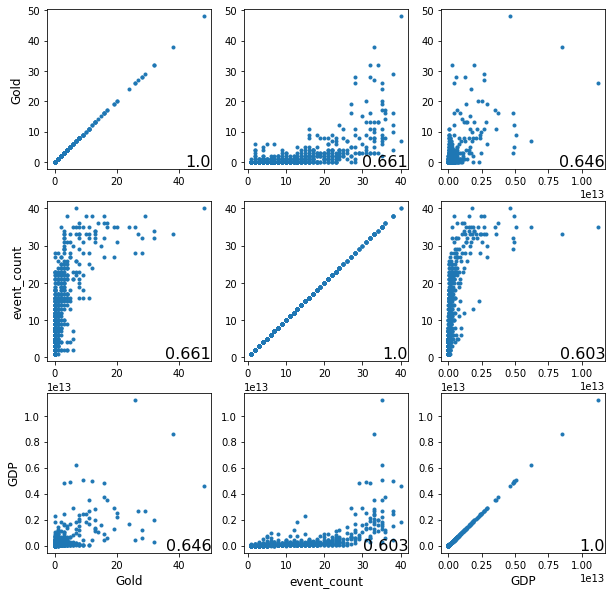

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

feature = ['Gold', 'event_count', 'GDP']
corr_feture = data_1994_drop.corr()

fig = plt.figure(figsize=(10, 10))

n_feature = len(feature)
for i in range(n_feature):
  for j in range(n_feature):
    ax = fig.add_subplot(n_feature, n_feature, i*n_feature + j + 1)
    plt.scatter(feature[j], feature[i], data=data_1994_drop, s=9)

    if i == n_feature-1:
      plt.xlabel(feature[j], fontsize=12)
    if j == 0:
      plt.ylabel(feature[i], fontsize=12)
    ax.annotate(np.round(corr_feture.loc[feature[i], feature[j]], 3), xy=(1,0),
                xycoords='axes fraction', fontsize=16,
                horizontalalignment='right', verticalalignment='bottom')

In [ ]:
!pip install -U orca
!conda install -c plotly plotly-orca

/bin/bash: conda: command not found


In [ ]:
sample.to_csv('/content/BigDataTeamProject/hiseoung/corona_plot.csv')

In [ ]:
import plotly.express as px

def plot_corona(sample):

  fig = px.bar(sample, x='Death/100L Pop', y='Nation', orientation='h')
  template = 'plotly_dark'
  fig.update_traces(marker_color='#FCE762')
  fig.update_layout(template=template, title="Corona Death/100L Population: '%s' theme" % template)
  path = '경로를 입력해주세요'
  fig.write_image(path)
  
  return path

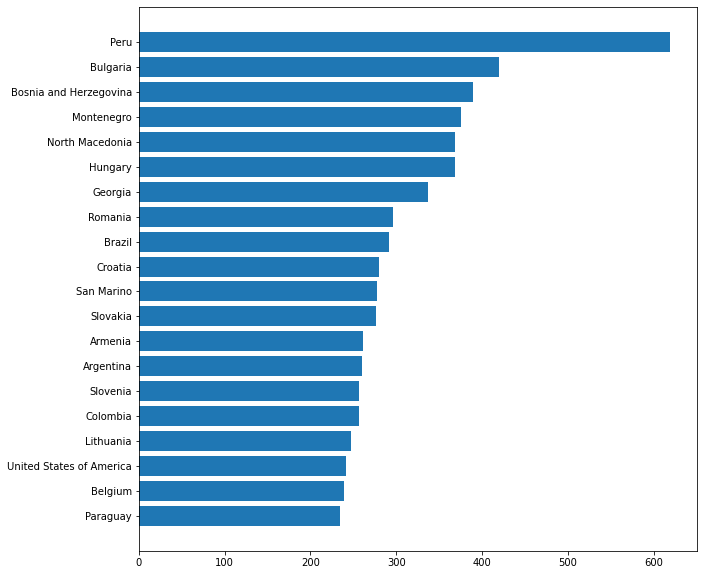

In [ ]:
def plot_corona(sample):

  plt.figure(figsize=(10, 10))

  nations = sample['Nation']
  values = sample['Death/100L Pop']

  y = np.arange(len(sample))
  fig = plt.barh(y, values)
  fig = plt.yticks(y, nations)

  return fig
plot_corona(sample)

In [ ]:
data_1994_drop.head()

,Nation,Olympic,Gold,Silver,Bronze,event_count,date,label,GDP
864,People's Republic of China,beijing-2008,48,22,30,40,2008,summer,4.598206e+12
576,People's Republic of China,london-2012,38,31,22,33,2012,summer,8.560547e+12
1904,Germany,barcelona-1992,33,21,28,30,1992,summer,2.123131e+12
1149,People's Republic of China,athens-2004,32,17,14,34,2004,summer,1.955347e+12
1409,Russian Federation,sydney-2000,32,28,29,32,2000,summer,2.597085e+11


In [ ]:
data = data_1994_drop[data_1994_drop['date'] == '2016']
data.head()

,Nation,Olympic,Gold,Silver,Bronze,event_count,date,label,GDP
302,Great Britain,rio-2016,27,23,17,33,2016,summer,2.647899e+12
314,People's Republic of China,rio-2016,26,18,26,35,2016,summer,1.119915e+13
286,Russian Federation,rio-2016,19,17,20,35,2016,summer,1.283163e+12
294,Germany,rio-2016,17,10,15,35,2016,summer,3.477796e+12
304,Japan,rio-2016,12,8,21,38,2016,summer,4.940159e+12


In [ ]:
data_1994_drop.head()

,Nation,Olympic,Gold,Silver,Bronze,event_count,date,label,GDP
864,People's Republic of China,beijing-2008,48,22,30,40,2008,summer,4.598206e+12
576,People's Republic of China,london-2012,38,31,22,33,2012,summer,8.560547e+12
1904,Germany,barcelona-1992,33,21,28,30,1992,summer,2.123131e+12
1149,People's Republic of China,athens-2004,32,17,14,34,2004,summer,1.955347e+12
1409,Russian Federation,sydney-2000,32,28,29,32,2000,summer,2.597085e+11


In [ ]:
data = data_1994_drop[data_1994_drop['date'] == '20']

In [ ]:
data.head()

,Nation,Olympic,Gold,Silver,Bronze,event_count,date,label,GDP
864,People's Republic of China,beijing-2008,48,22,30,40,2008,summer,4.598206e+12
861,Russian Federation,beijing-2008,24,13,23,35,2008,summer,1.660844e+12
875,Great Britain,beijing-2008,19,13,19,27,2008,summer,2.890564e+12
863,Germany,beijing-2008,16,11,14,36,2008,summer,3.752366e+12
854,Australia,beijing-2008,14,15,17,36,2008,summer,1.055335e+12


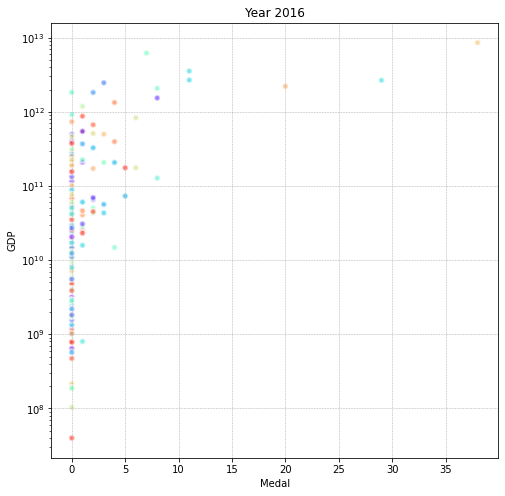

In [ ]:

data = data_1994_drop[data_1994_drop['date'] == '2012']
# data.head()
# # data = data.loc[data['date'] == target_year]
# # data['continent']=pd.Categorical(data['continent']) 
# data = data_1994_drop.loc[data_1994_drop['date'] == target_year]
# print(data)
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
 
plt.scatter(
    x = data['Gold'], 
    y = data['GDP'], 
    c=data['Nation'].astype('category').cat.codes, 
    cmap="rainbow", 
    alpha=0.6, 
    edgecolors="white", 
    linewidth=2);
 
plt.yscale('log')
plt.xlabel("Medal")
plt.ylabel("GDP")
plt.title(f"Year {target_year}")
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.show()